In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import networkx as nx
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/elliebarranbeck/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
UK_fulldataset=pd.read_csv('Outputs/UK_ball_results.csv')

In [4]:
UK_fulldataset

ONSConstID               Constituency     qunone        qu1        qu2  \
0     E14000530                  Aldershot  17.846841  11.905262  14.365447   
1     E14000531        Aldridge-Brownhills  22.310632  10.832655  14.345906   
2     E14000531        Aldridge-Brownhills  22.310632  10.832655  14.345906   
3     E14000531        Aldridge-Brownhills  22.310632  10.832655  14.345906   
4     E14000531        Aldridge-Brownhills  22.310632  10.832655  14.345906   
...         ...                        ...        ...        ...        ...   
1206  W07000078          Vale of Glamorgan  16.272586   8.706474  14.877348   
1207  W07000078          Vale of Glamorgan  16.272586   8.706474  14.877348   
1208  W07000078          Vale of Glamorgan  16.272586   8.706474  14.877348   
1209  W07000079               Cardiff West  19.235406   7.887033  12.280934   
1210  W07000080  Cardiff South and Penarth  19.893298   7.998291  12.262001   

            qu3        qu4   quother      White  nssec_student  ...  \
0     17.364972  29.787469  8.730010  78.450492       4.921475  ...   
1     17.334440  26.292212  8.884155  88.662237       5.038608  ...   
2     17.334440  26.292212  8.884155  88.662237       5.038608  ...   
3     17.334440  26.292212  8.884155  88.662237       5.038608  ...   
4     17.334440  26.292212  8.884155  88.662237       5.038608  ...   
...         ...        ...       ...        ...            ...  ...   
1206  17.225081  34.908460  8.010051  95.197022       5.614455  ...   
1207  17.225081  34.908460  8.010051  95.197022       5.614455  ...   
1208  17.225081  34.908460  8.010051  95.197022       5.614455  ...   
1209  13.973851  39.701421  6.921355  83.039274       7.917710  ...   
1210  14.956947  37.534235  7.355229  77.462973       9.242786  ...   

        Con2019    Lab2019  Firstparty2019  Leave  Congain1917  Congain1715  \
0     58.374364  23.537511             Con   57.9            0            0   
1     70.789487  20.370088             Con   67.8            0            0   
2     70.789487  20.370088             Con   67.8            0            0   
3     70.789487  20.370088             Con   67.8            0            0   
4     70.789487  20.370088             Con   67.8            0            0   
...         ...        ...             ...    ...          ...          ...   
1206  49.820278  43.321109             Con   52.6            0            0   
1207  49.820278  43.321109             Con   52.6            0            0   
1208  49.820278  43.321109             Con   52.6            0            0   
1209  27.983628  51.774693             Lab   43.8            0            0   
1210  28.954705  54.137092             Lab   42.8            0            0   

      Conswing1917  Conswing1715  point  ball  
0         3.318184      4.464073      0     0  
1         5.381260     13.358704      1     0  
2         5.381260     13.358704      1     2  
3         5.381260     13.358704      1    11  
4         5.381260     13.358704      1    17  
...            ...           ...    ...   ...  
1206      2.348295      1.448159    568     2  
1207      2.348295      1.448159    568     4  
1208      2.348295      1.448159    568    25  
1209     -1.770388      4.603303    569     0  
1210     -1.236875      3.378200    570     0  

[1211 rows x 45 columns]

## Coloured by each axes

In [5]:
# Dataset utilised to build BM plot, epsilon=20 utilised throughout
bmx1=UK_fulldataset[['qunone', 'qu1', 'qu2', 'qu3', 'qu4',
       'quother', 'White', 'nssec_student', 'nssec_higher_managerial',
       'nssec_intermediate', 'nssec_lower_managerial',
       'nssec_lower_supervisory', 'nssec_unemployed', 'nssec_routine',
       'nssec_semi_routine', 'nssec_small_employers', 'age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban',
       'dep_none', 'dep_one', 'dep_two_more']]

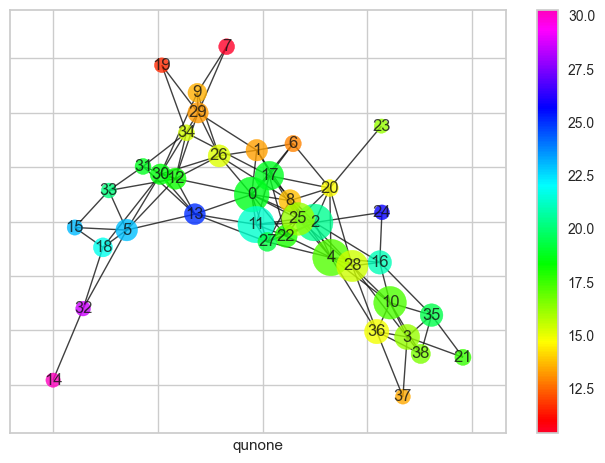

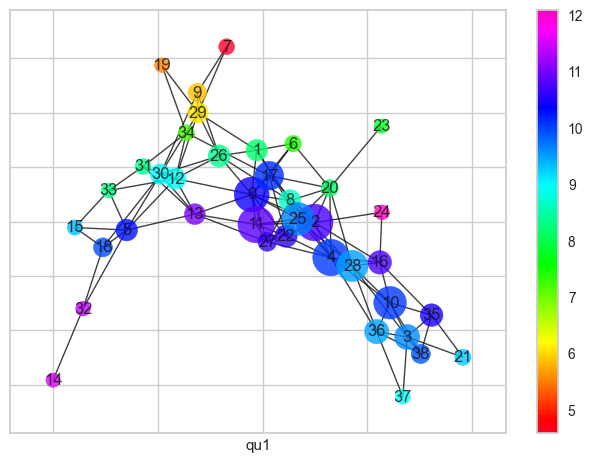

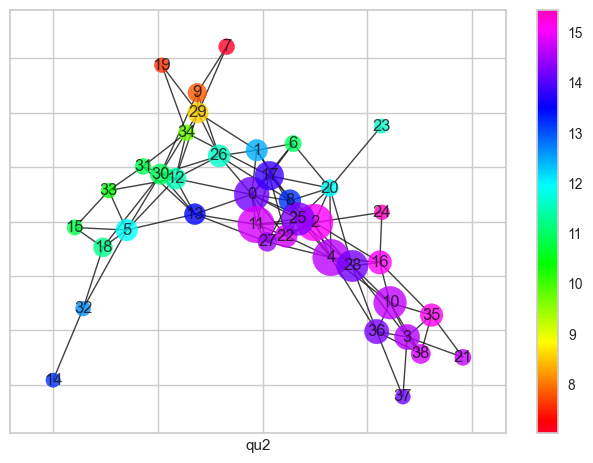

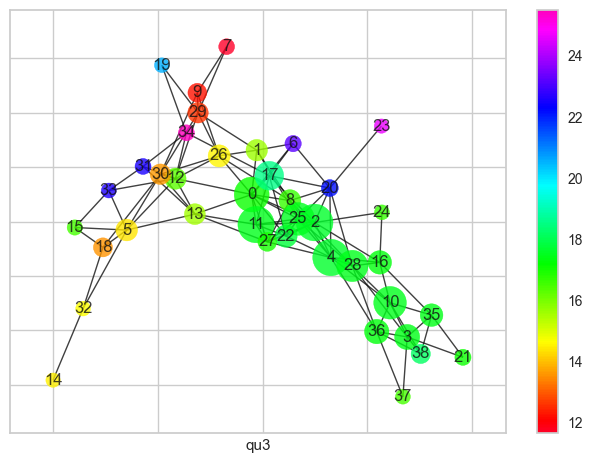

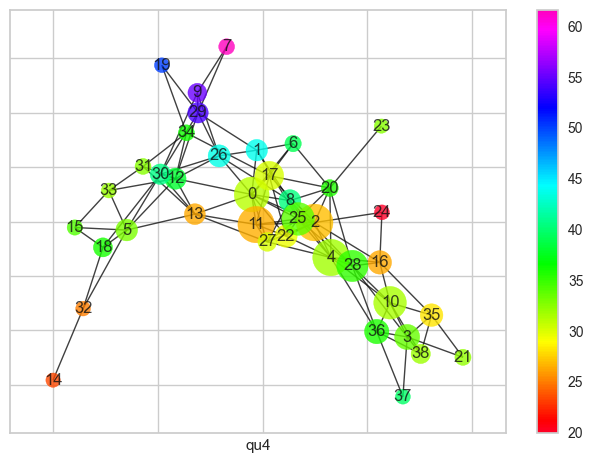

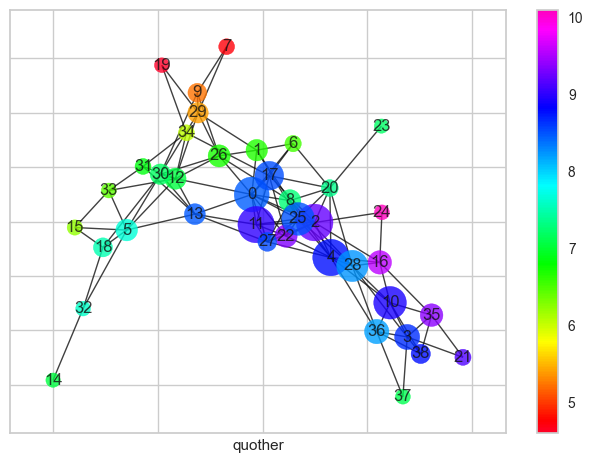

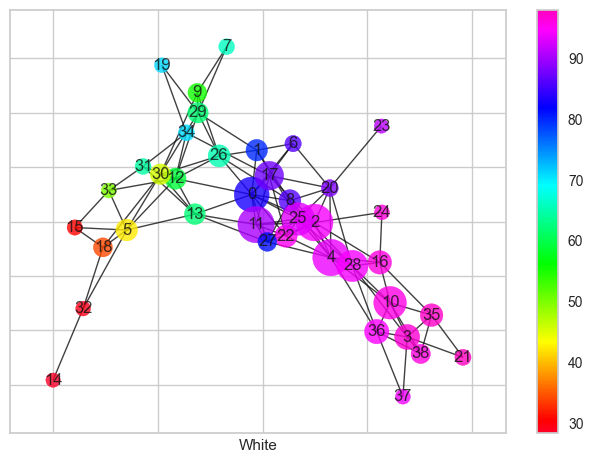

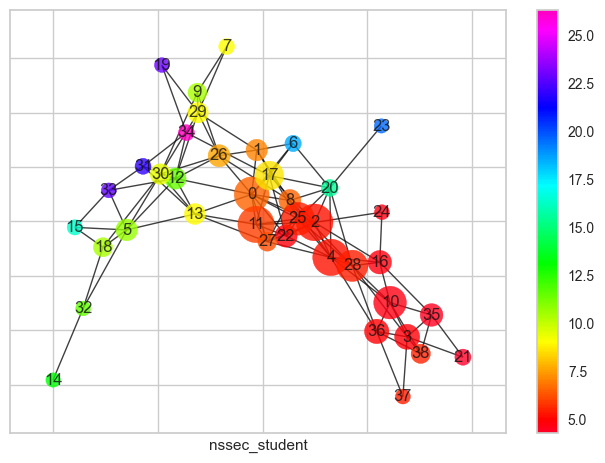

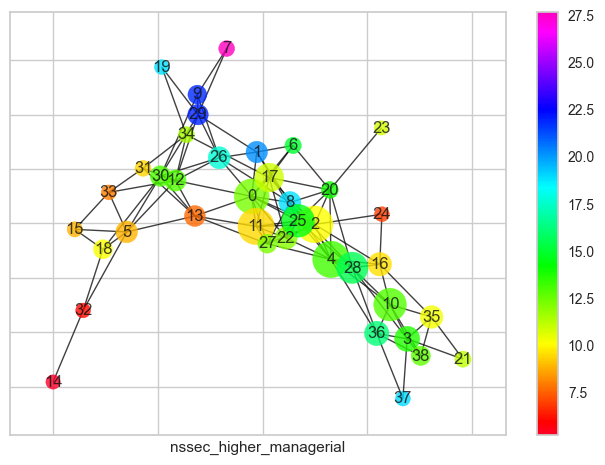

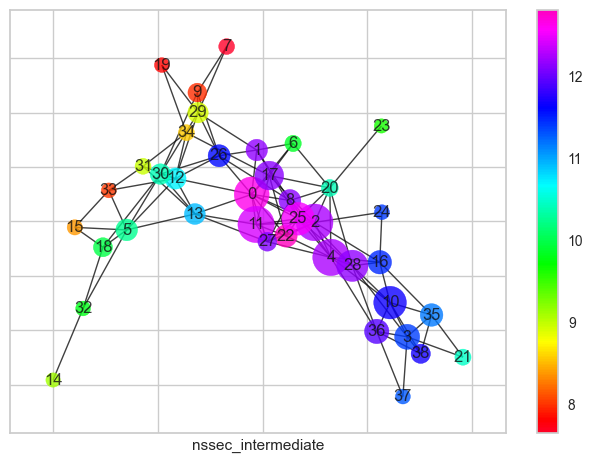

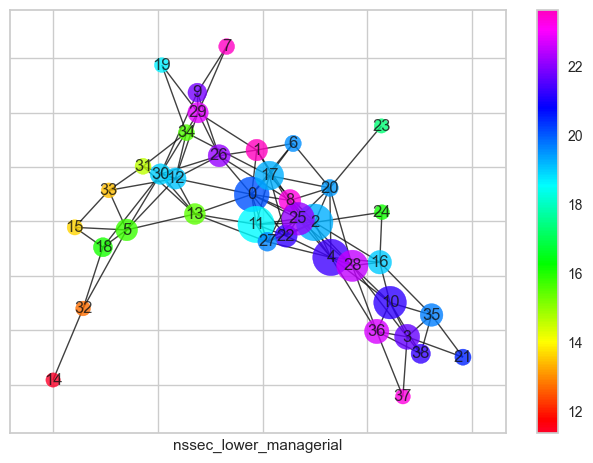

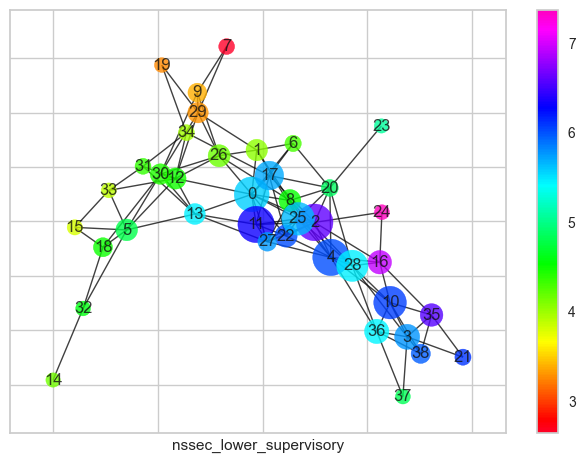

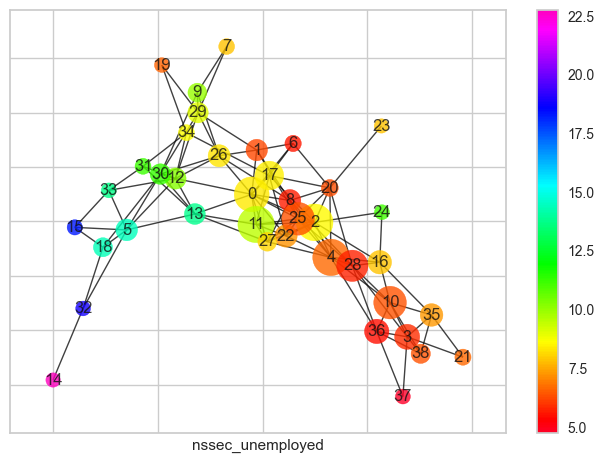

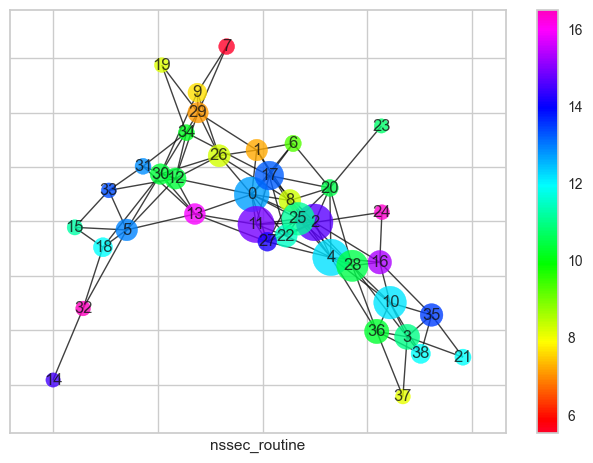

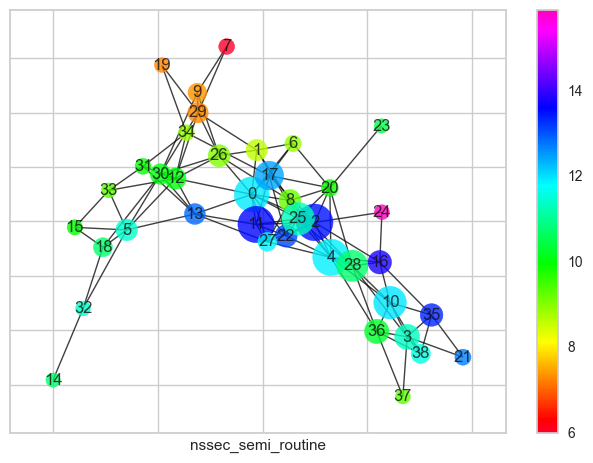

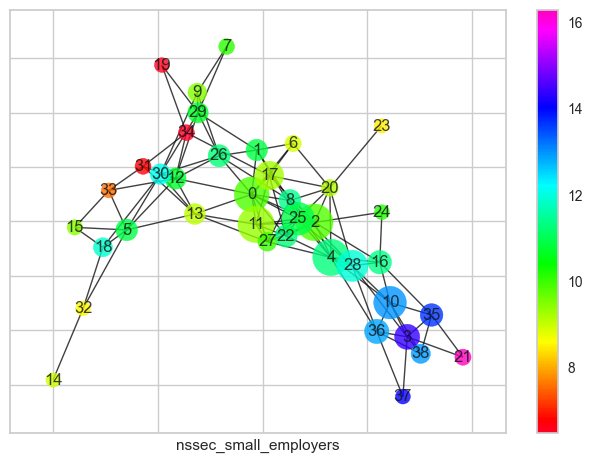

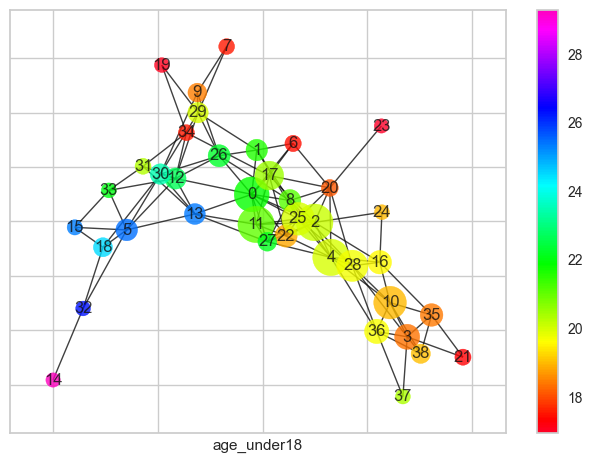

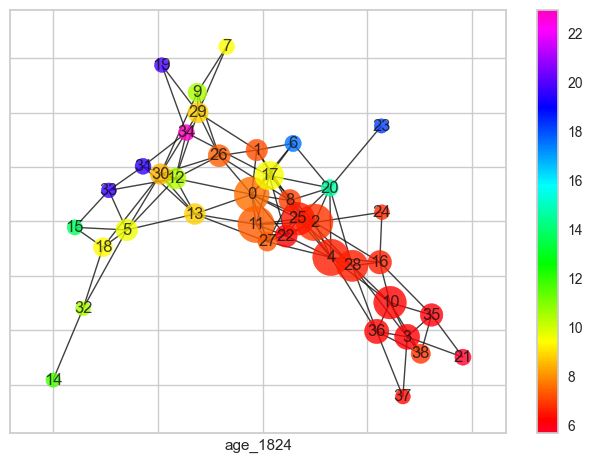

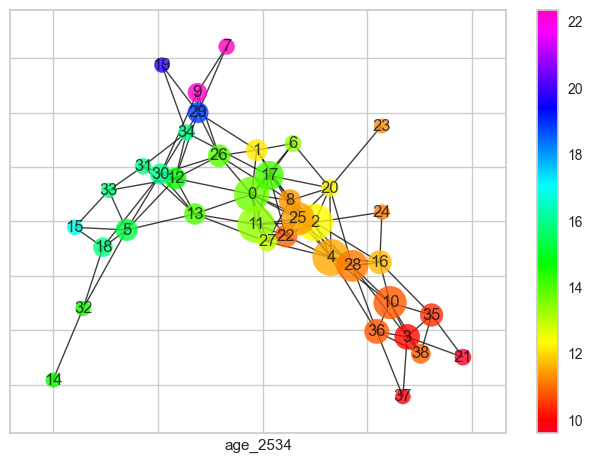

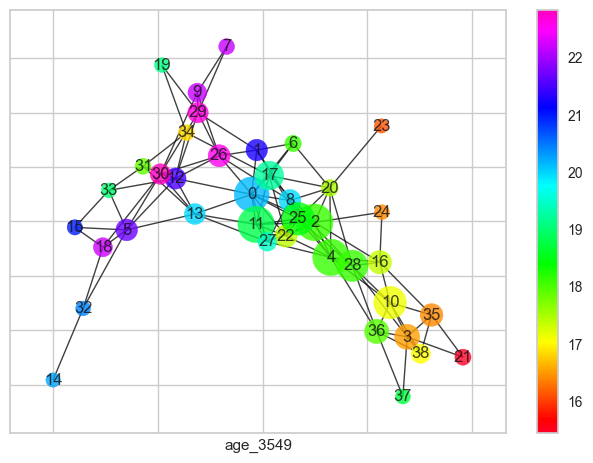

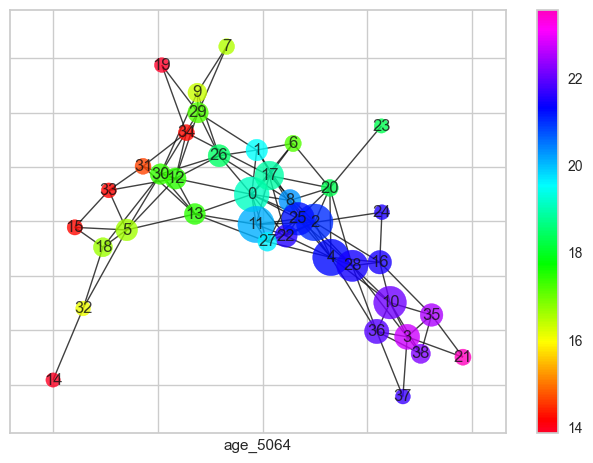

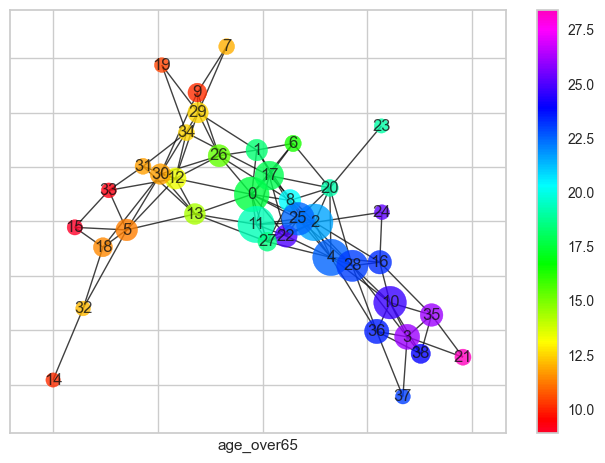

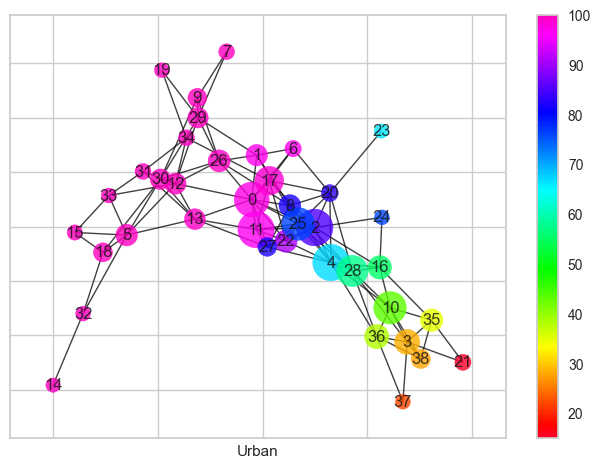

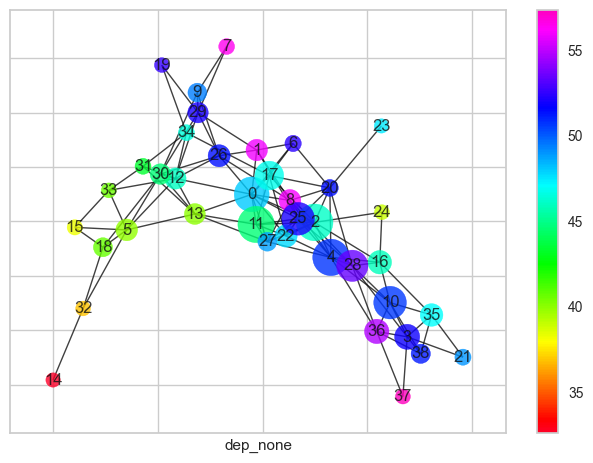

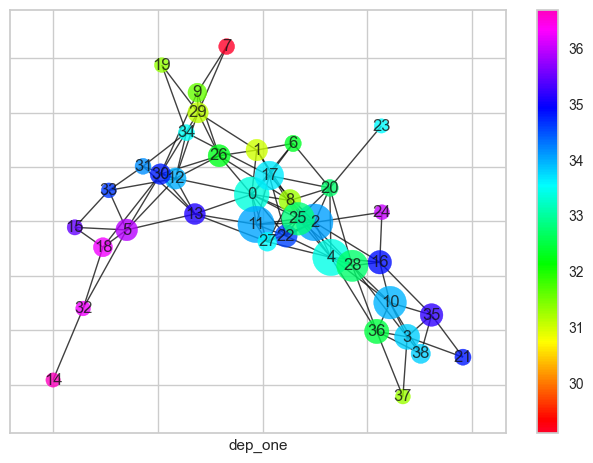

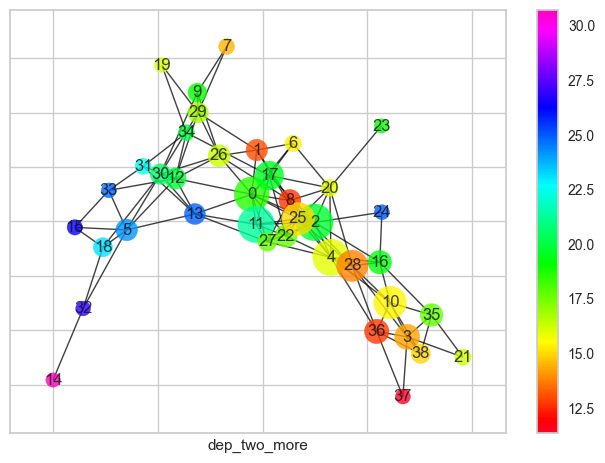

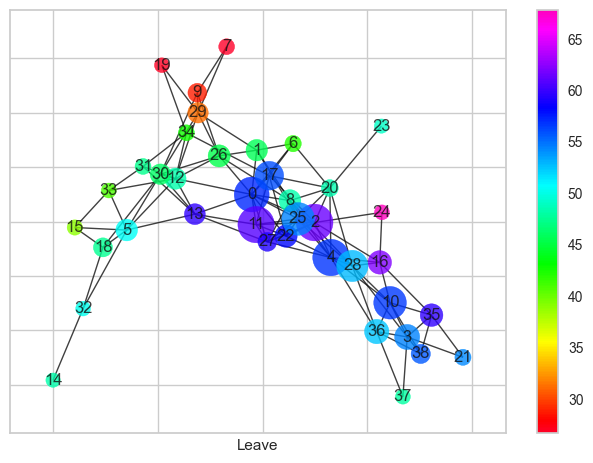

In [9]:
columns=['qunone', 'qu1', 'qu2', 'qu3', 'qu4',
       'quother', 'White', 'nssec_student', 'nssec_higher_managerial',
       'nssec_intermediate', 'nssec_lower_managerial',
       'nssec_lower_supervisory', 'nssec_unemployed', 'nssec_routine',
       'nssec_semi_routine', 'nssec_small_employers', 'age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban',
       'dep_none', 'dep_one', 'dep_two_more','Leave']
for col in columns:
    cdf = pd.DataFrame(UK_fulldataset[col])
    bm1=pbm.BallMapper(X=bmx1, eps=20 ,coloring_df=cdf)
    hsvp = cm.get_cmap("gist_rainbow")
    bm1.draw_networkx(coloring_variable=col,color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,seed=5))
    plt.xlabel(col)
 
    filename = ["tdabm_" + str(col) + ".png"] 
    plt.savefig("UK results/TDABM by axes"+str(filename[0]))
    plt.show() 

## Maps for each ball

In [ ]:
## Reading in the shp file
gb_shape=gpd.read_file('UK data/Westminster_Parliamentary_Constituencies_Dec_2021_UK_BFE_2022_-7013535748659767197/PCON_DEC_2021_UK_BFE.shp')

In [ ]:
##Merging with dataset including column ball that identifies which ball each constituency belongs to. 
gb_shape2=gb_shape.merge(UK_fulldataset, left_on='PCON21CD',right_on='ONSConstID')

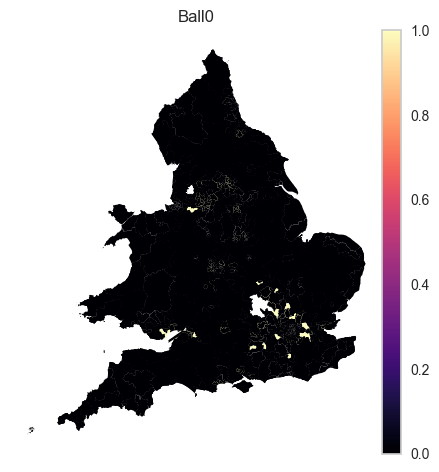

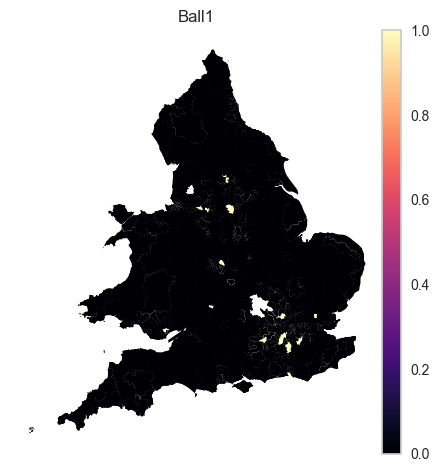

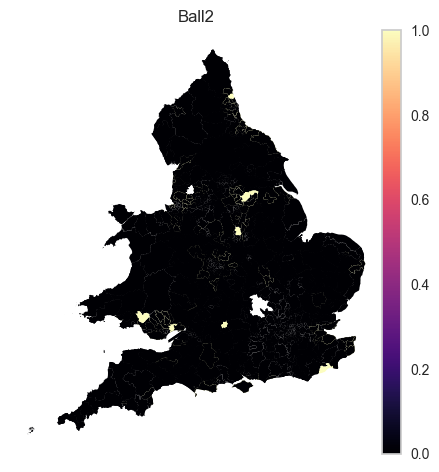

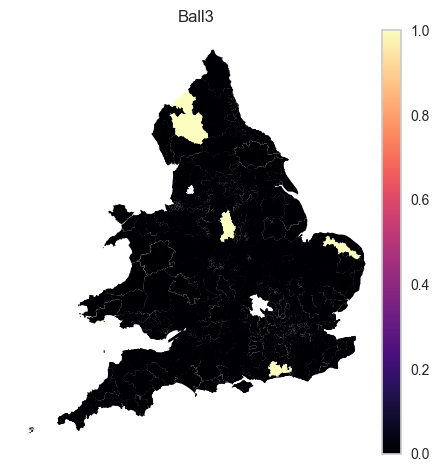

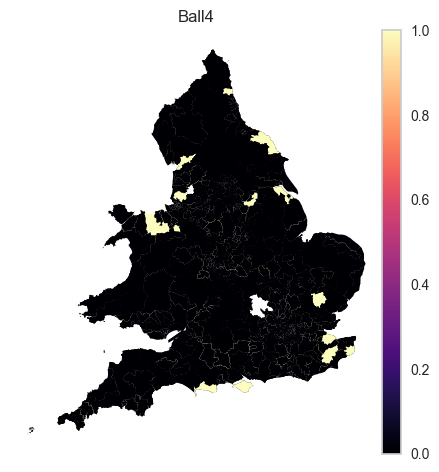

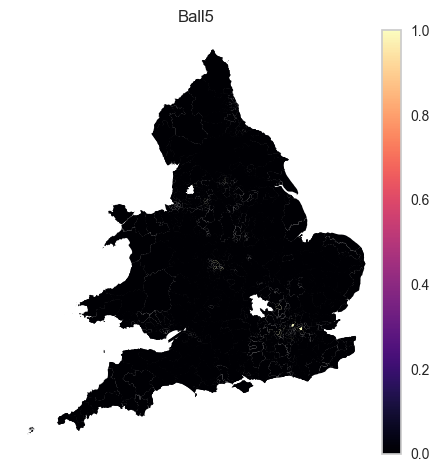

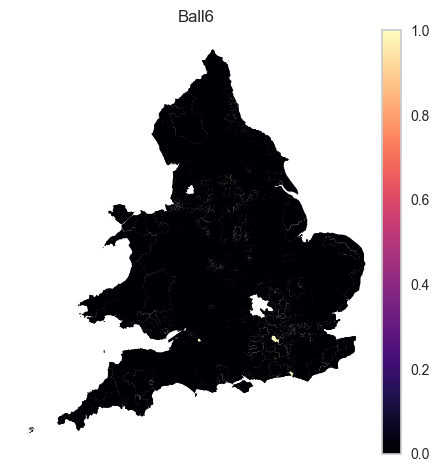

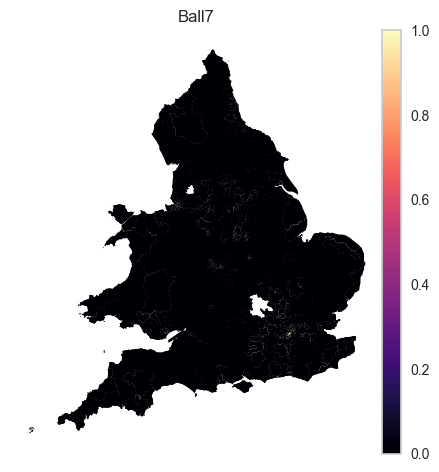

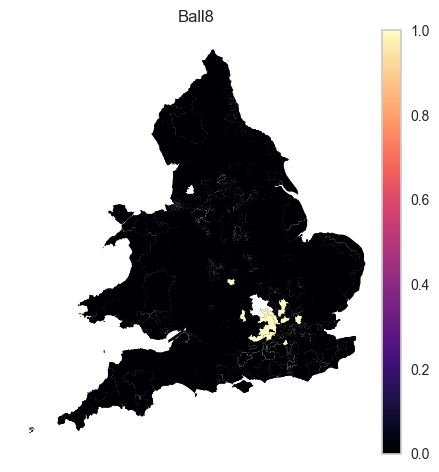

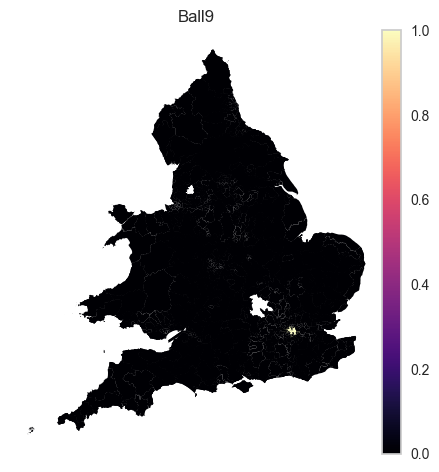

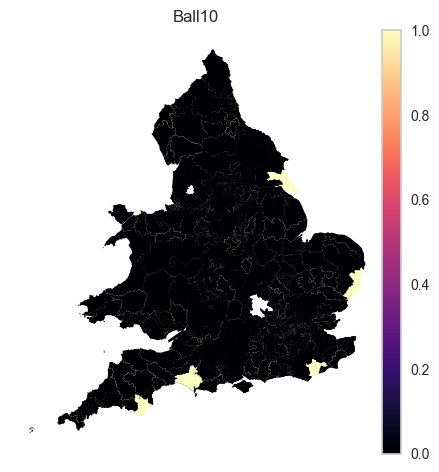

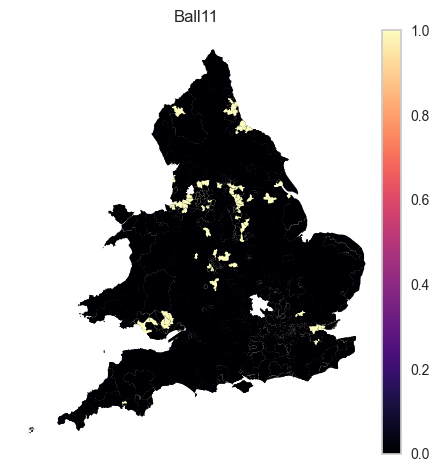

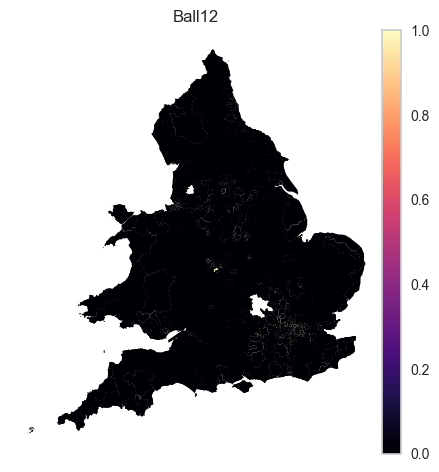

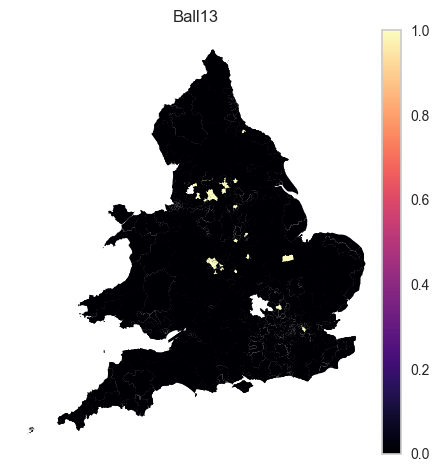

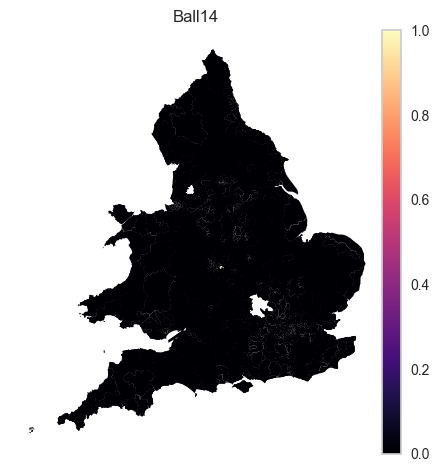

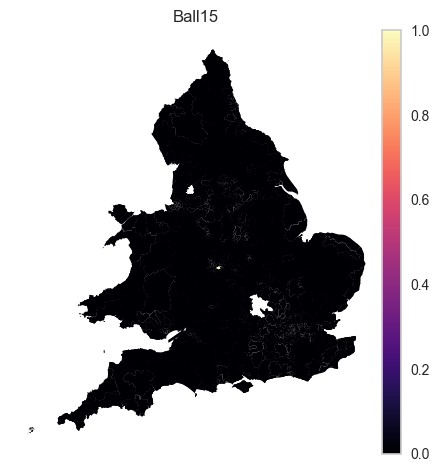

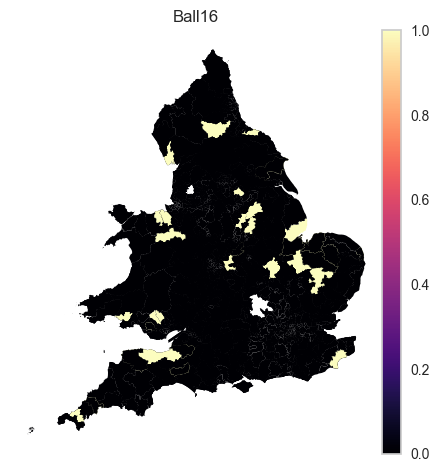

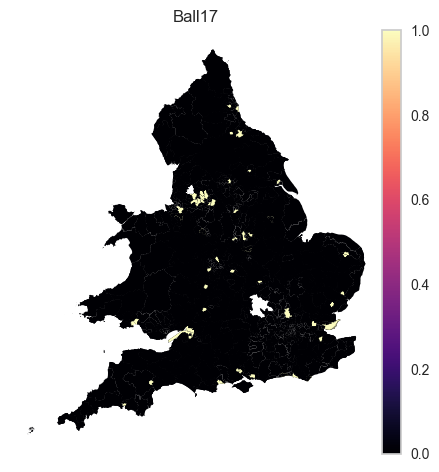

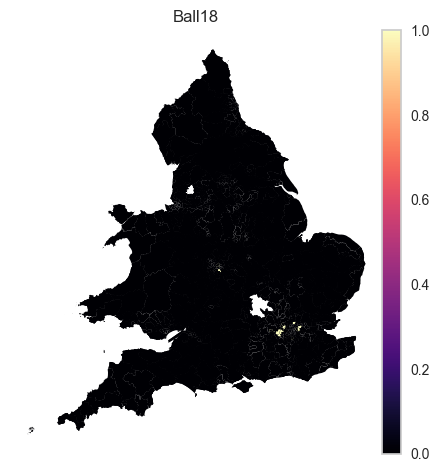

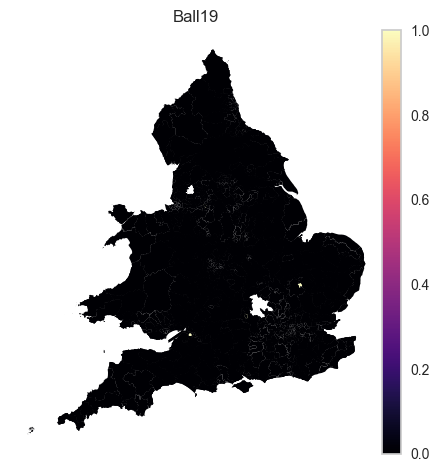

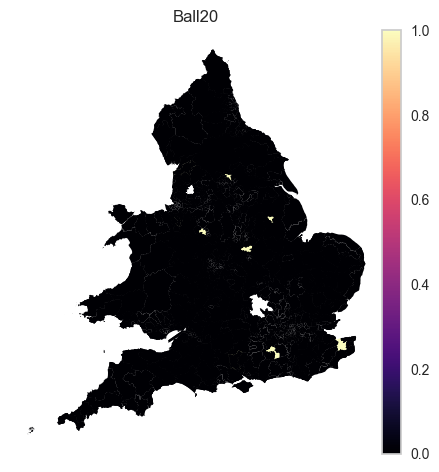

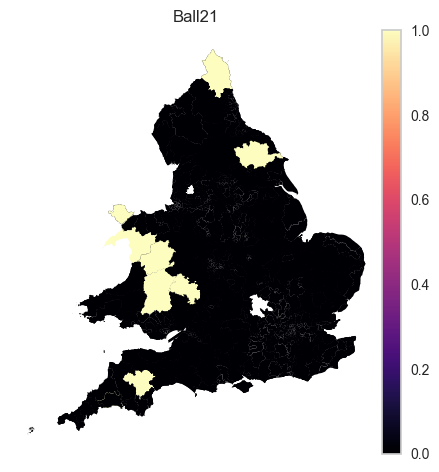

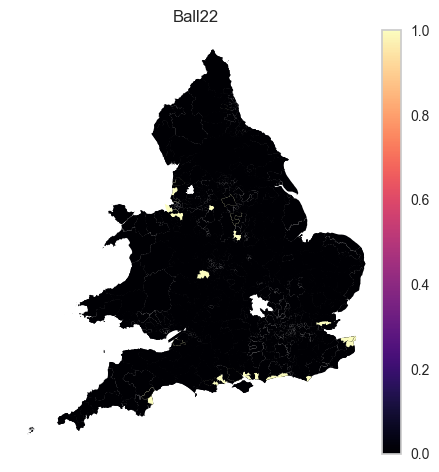

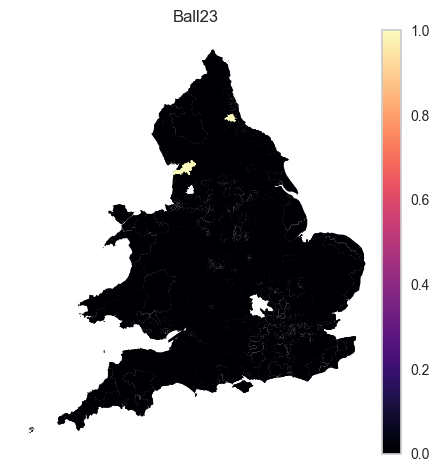

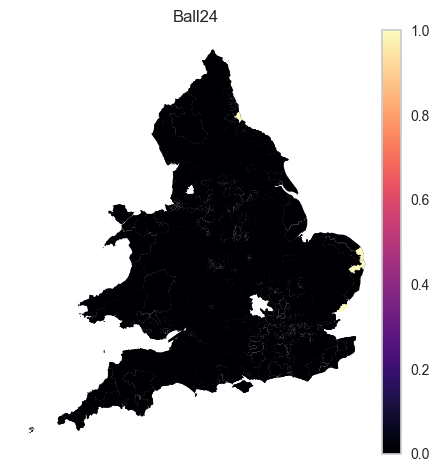

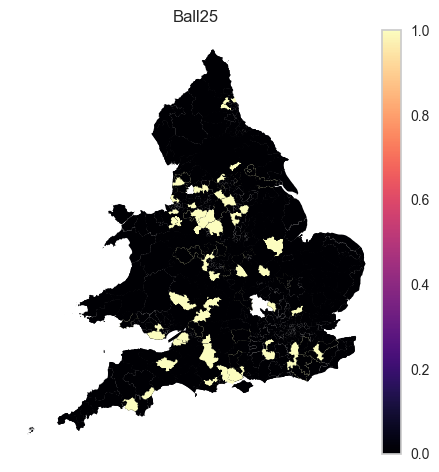

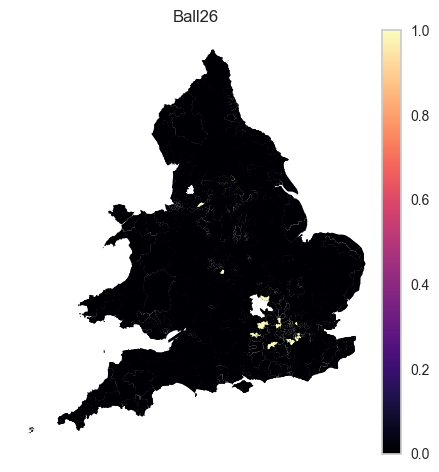

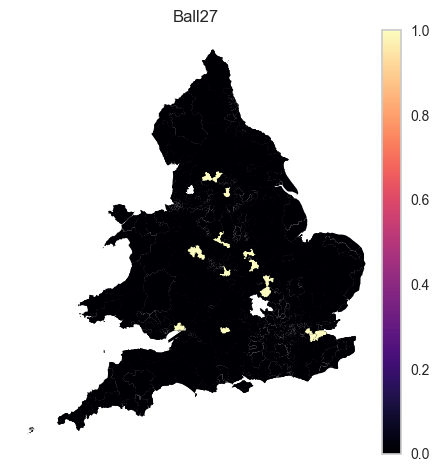

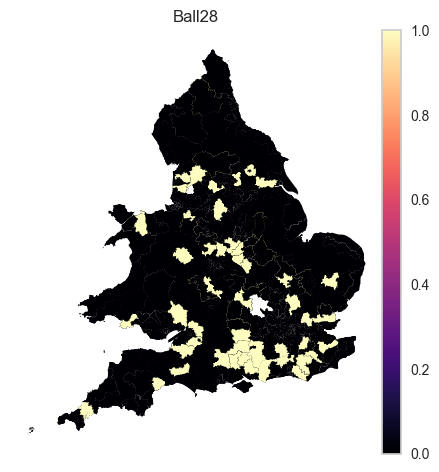

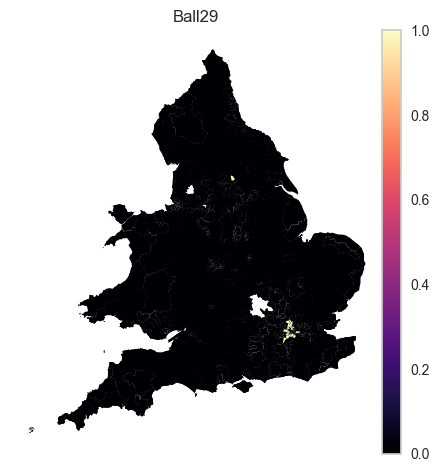

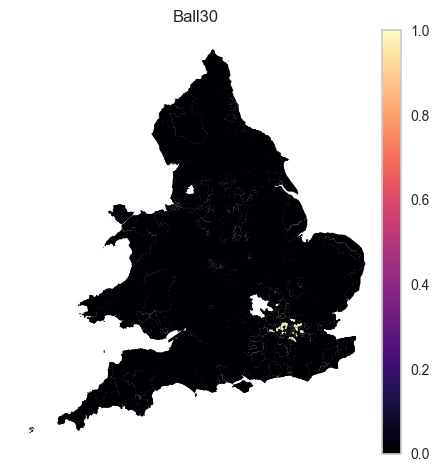

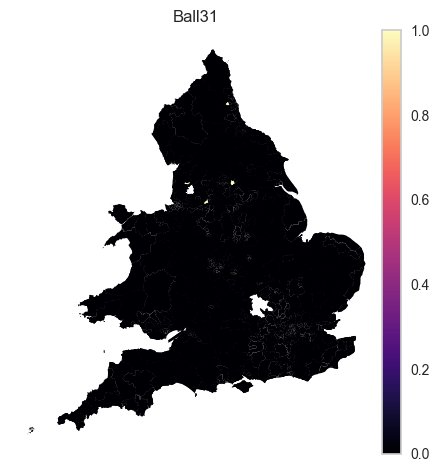

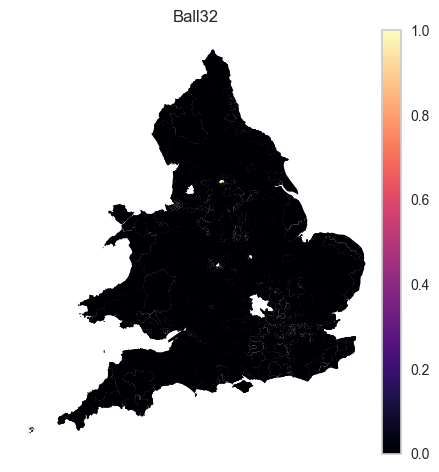

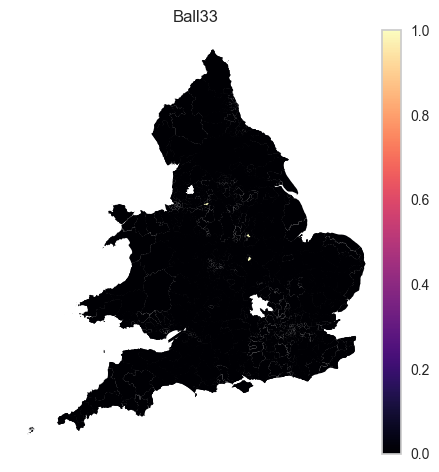

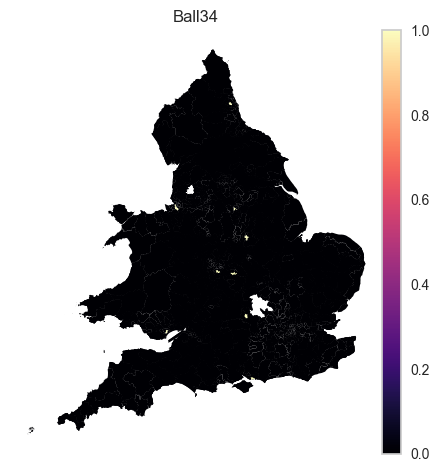

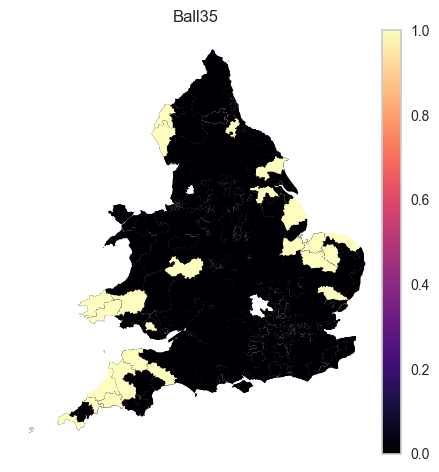

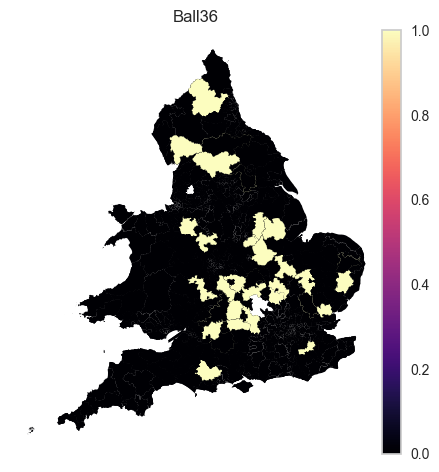

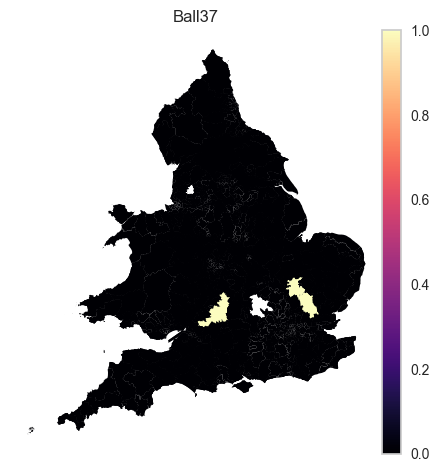

In [ ]:
## Producing maps for each ball
a001 = max(gb_shape2['ball'])
for i in range(0,a001):
    gb_shape2['balld'] = (gb_shape2['ball']==i)*1
    fig, ax = plt.subplots(1,1)
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",size="5%", pad=0.0)
    ax.set_title("Ball"+ str(i))
    gb_shape2.plot(column="balld",ax=ax,legend=True,cax=cax,cmap='magma')
   
    plt.show()
    filename = ["ballmap" + str(i) + ".png"] 
    fig.savefig("UK results/Ball Maps/"+str(filename[0]))